In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
import random

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
train_path = r'D:\university\Thesis\secondary dataset\archive_2\1training'
test_path = r'D:\university\Thesis\secondary dataset\archive_2\2testing'
val_path = r'D:\university\Thesis\secondary dataset\archive_2\3vali'

daisy


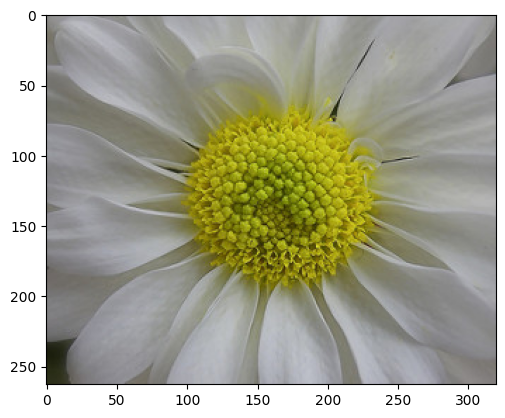

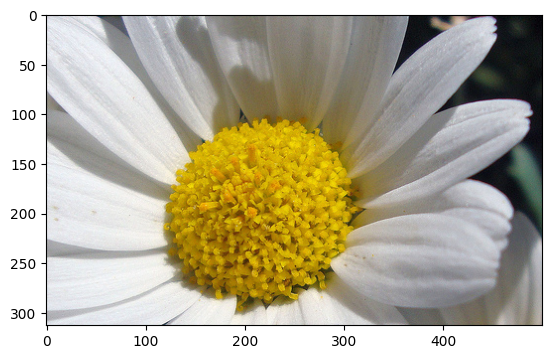

dandelion


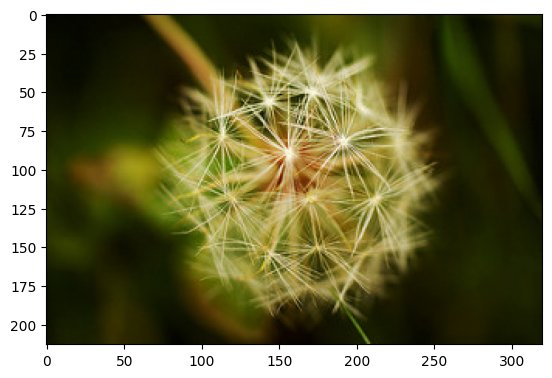

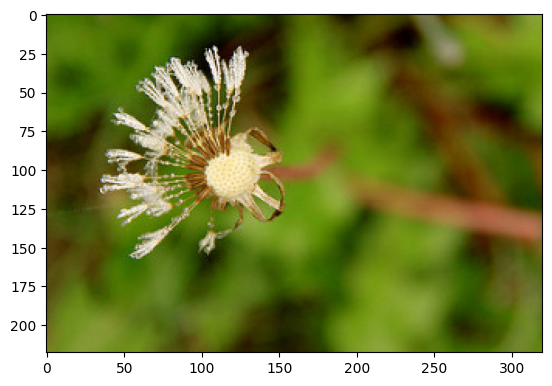

rose


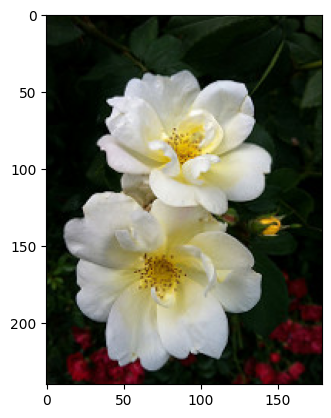

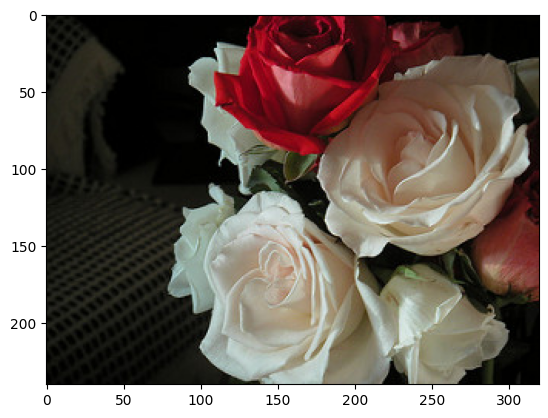

sunflower


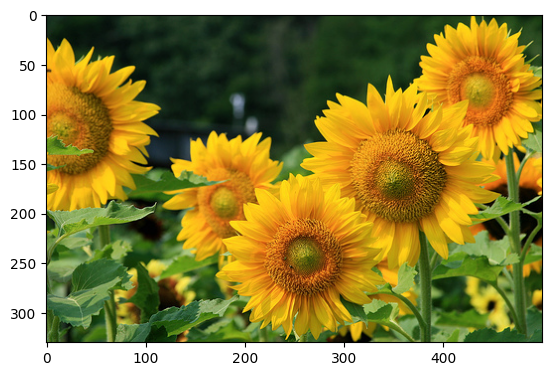

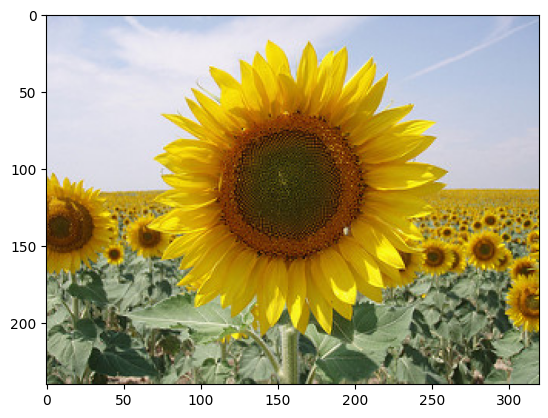

tulip


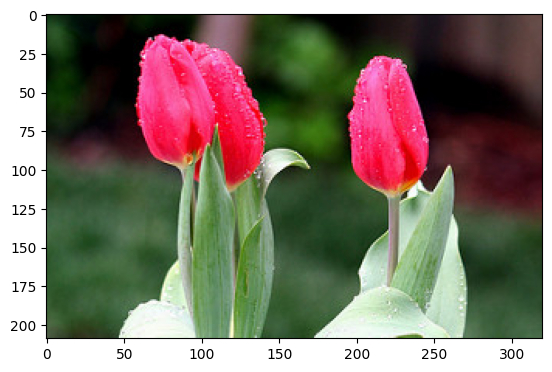

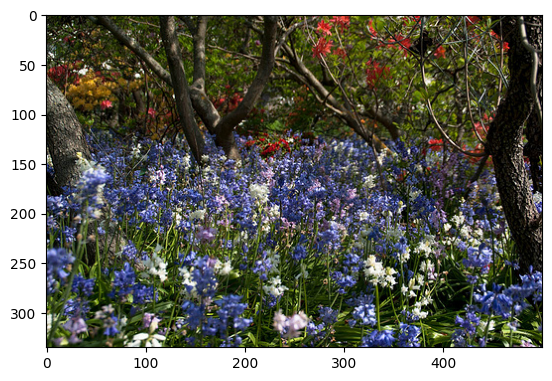

In [4]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [5]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [6]:
size = (250,250)

In [7]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [8]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [10]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2,
                                 vertical_flip=True,
                                 horizontal_flip=True,
                                 shear_range=0.2,
                                 rotation_range=20,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 1,
                                          class_mode = class_mode)
    return classes

In [11]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 3235 images belonging to 5 classes.
Found 629 images belonging to 5 classes.
Found 453 images belonging to 5 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
train_class.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
a = train_class.class_indices

In [15]:
y_train.shape,y_test.shape,y_val.shape

((3235,), (629,), (453,))

In [16]:
inc = InceptionV3(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [17]:
for layer in inc.layers:
    layer.trainable = False

x = Flatten()(inc.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
prediction = Dense(5, activation='softmax')(x)

model3 = Model(inputs=inc.input, outputs=prediction)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 124, 124, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 124, 124, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 124, 124, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import datetime

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learn_control = ReduceLROnPlateau(monitor='accuracy', patience=5,
                                  verbose=0,factor=0.1, min_lr=1e-7)
earlyStopping = EarlyStopping(monitor='accuracy', patience=5, verbose=0, mode='max')
mcp_save = ModelCheckpoint(r'C:\Users\faysa\Desktop\Flower_Recognition\final\model3_mcp.hdf5', save_best_only=True, monitor='val_loss', mode='min')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [20]:
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

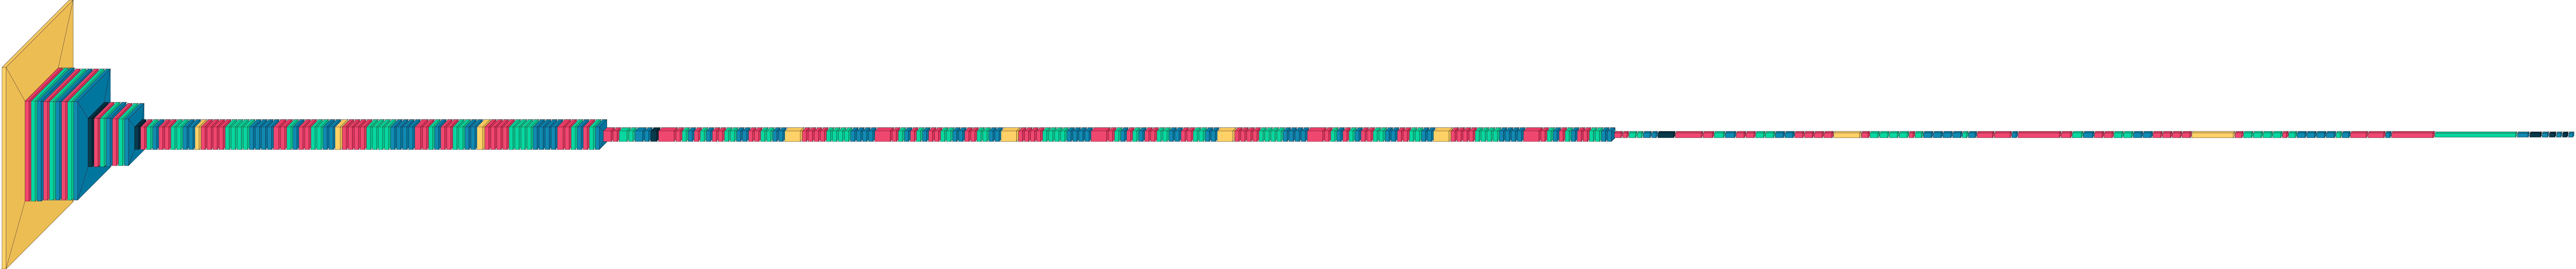

In [21]:
visualkeras.layered_view(model3)

In [22]:
tf.keras.backend.clear_session()

In [23]:
#history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs =30,batch_size =1,shuffle=True)

In [24]:
history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs =30,batch_size =1,shuffle=True)

Epoch 1/30
3235/3235 [==============================] - 144s 22ms/step - loss: 2.7140 - accuracy: 0.6185 - val_loss: 0.7680 - val_accuracy: 0.7241
Epoch 2/30
3235/3235 [==============================] - 66s 20ms/step - loss: 0.8793 - accuracy: 0.7206 - val_loss: 0.9982 - val_accuracy: 0.6512
Epoch 3/30
3235/3235 [==============================] - 66s 20ms/step - loss: 0.7564 - accuracy: 0.7589 - val_loss: 0.8071 - val_accuracy: 0.7329
Epoch 4/30
3235/3235 [==============================] - 67s 21ms/step - loss: 0.6618 - accuracy: 0.7960 - val_loss: 0.8044 - val_accuracy: 0.7528
Epoch 5/30
3235/3235 [==============================] - 68s 21ms/step - loss: 0.6204 - accuracy: 0.8142 - val_loss: 1.0238 - val_accuracy: 0.7417
Epoch 6/30
3235/3235 [==============================] - 68s 21ms/step - loss: 0.6701 - accuracy: 0.8130 - val_loss: 0.8717 - val_accuracy: 0.7241
Epoch 7/30
3235/3235 [==============================] - 68s 21ms/step - loss: 0.7073 - accuracy: 0.7944 - val_loss: 0.8454 

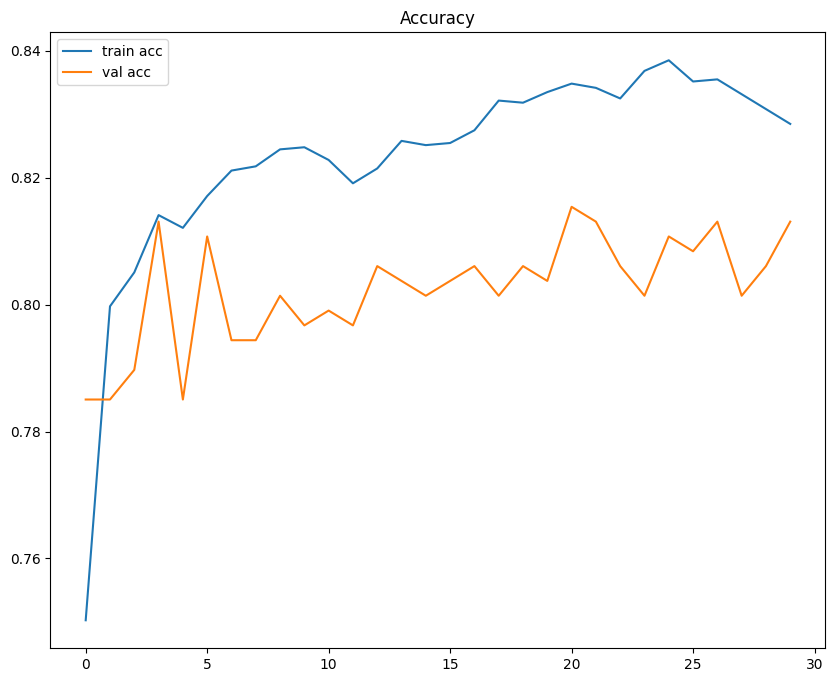

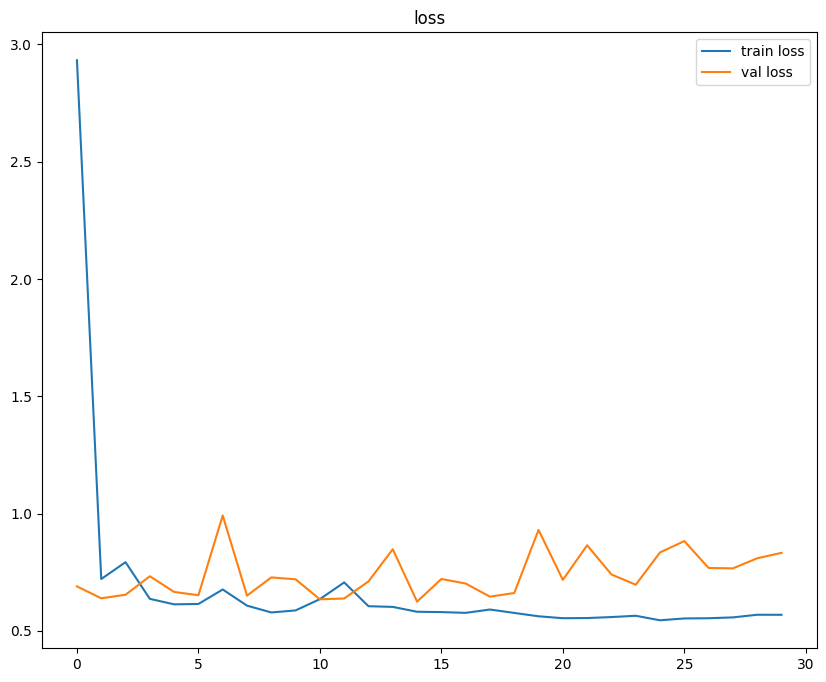

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.title('loss')
plt.show()

In [25]:
#model3.save(r'C:\Users\faysa\Desktop\Flower_Recognition\final\save model\model3.hdf5')

In [25]:
classes=['Bloom','Pre Bloom', 'Post Bloom']

In [29]:
from keras.preprocessing import image
import numpy as np
import keras

img_pred=tf.keras.utils.load_img(r"D:\university\Thesis\final\Flower kath golap\New folder (2)\1training\Post Bloom\306448065_454221676763154_145681186212636680_n.jpg",target_size=(250,250))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds= [model3.predict(img_pred)]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

print(m1)

classes[p1]


[array([[0.36301443, 0.3164348 , 0.32055083]], dtype=float32)]
0.36301443


'Bloom'

776


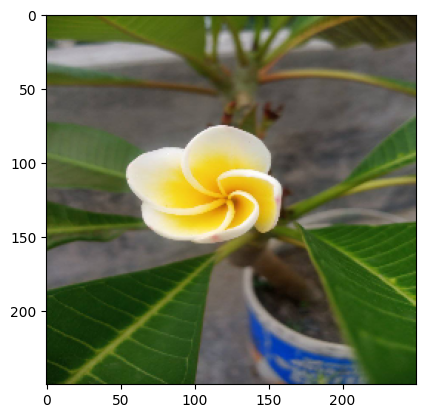

[array([[0.36301443, 0.3164348 , 0.32055083]], dtype=float32)]
0.36301443


'Bloom'

In [27]:
img_sample=random.randint(0,len(y_test))

print(img_sample)

plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

img_pred=(x_test[img_sample, :].astype('float32'))
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255


preds= [model3.predict(img_pred)]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

print(m1)

classes[p1]